In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader 
import numpy as np
import cv2

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [3]:
dsetAbsLmks = np.load("../features/dsetAbsLmks2.npy")

In [5]:
dsetAbsLmks[204].shape

(65,)

In [6]:
dsetAbsLmks[204]

array([ 4.31281507e-01,  8.53407323e-01,  4.78578613e-07,  5.28024375e-01,
        7.91580319e-01, -4.57092151e-02,  5.85789084e-01,  6.47202730e-01,
       -5.22061810e-02,  5.57216823e-01,  5.26896417e-01, -5.64637743e-02,
        4.85509366e-01,  4.77453560e-01, -5.82755022e-02,  5.73314488e-01,
        4.91510391e-01, -2.24775937e-03,  5.93718469e-01,  3.48280370e-01,
       -2.69690603e-02,  5.91278672e-01,  2.57417649e-01, -5.33234440e-02,
        5.80380201e-01,  1.78323597e-01, -7.45921955e-02,  5.17271698e-01,
        4.69100684e-01, -5.69431949e-03,  5.39254546e-01,  3.12861294e-01,
       -2.44036913e-02,  5.45751512e-01,  2.13418424e-01, -4.55217212e-02,
        5.44572115e-01,  1.30341142e-01, -6.20588325e-02,  4.60966855e-01,
        4.75928575e-01, -1.88735910e-02,  4.77638692e-01,  3.24570119e-01,
       -3.98017094e-02,  4.88293588e-01,  2.33943790e-01, -5.67678139e-02,
        4.89725024e-01,  1.57623619e-01, -6.90200329e-02,  4.00030255e-01,
        5.03061652e-01, -

In [7]:
X = dsetAbsLmks[:, :63]
y = dsetAbsLmks[:, 63:]

In [8]:
print("X.shape: ", X.shape, "\ny.shape: ", y.shape)

X.shape:  (3357, 63) 
y.shape:  (3357, 2)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
y_train[0]

array([ 8., 50.])

In [13]:
y_train[:5]

array([[  8.,  50.],
       [  4., 140.],
       [  6., 195.],
       [ 20.,  64.],
       [ 13.,  16.]])

In [14]:
numTrain = y_train[:, -1]
numTest = y_test[:, -1]
y_train = y_train[:, 0]
y_test = y_test[:, 0]

In [15]:
encoder = OneHotEncoder(sparse = False)
y_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_test = encoder.fit_transform(y_test.reshape(-1, 1))

c:\Users\HP\.conda\envs\DL\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\HP\.conda\envs\DL\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [17]:
y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]])

In [18]:
class NN(nn.Module):
  def __init__(self, input_size, num_classes):
    super(NN, self).__init__()
    self.fc1 = nn.Linear(input_size, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, num_classes)


# Sequential Layer
  def forward(self, x):
    x = self.fc3(F.relu(self.fc2(F.relu(self.fc1(x)))))
    return x

In [19]:

def calculate_accuracy(y_pred, y_true):
    _, predicted = torch.max(y_pred, 1)
    _, true = torch.max(y_true, 1)
    correct = (predicted == true).sum().item()
    accuracy = correct / y_true.size(0)
    return accuracy

In [20]:
X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)

In [21]:
X_train = X_train.float()
X_test = X_test.float()
y_train = y_train.float()
y_test = y_test.float()

In [22]:
X_train.dtype

torch.float32

In [34]:
input_size = 63          # Number of input features (e.g., flattened size of images)
num_classes = 24           # Number of output classes
learning_rate = 0.01      # Learning rate for the optimization algorithm
batch_size = 64             # Number of input samples in each mini-batch
num_epochs = 1

In [38]:
model_1 = NN(input_size=input_size, num_classes=num_classes)

In [39]:
# Define the loss criterion as CrossEntropyLoss and the optimization algorithm as Adam
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_1.parameters(), lr=learning_rate)

In [40]:
epochs = 100

epochCount = []
trainLossCount = []
testLossCount = []
trainAccCount = []
testAccCount = []

for epoch in range(epochs):
  #start training mode
  model_1.train()

  #calculate predictions
  y_logits = model_1(X_train)

  #loss calculation
  loss = criterion(y_logits, y_train)

  #set all gradients to zero
  optimizer.zero_grad()

  #back propagation(calculating gradients)
  loss.backward()

  #changing the value of parameters
  optimizer.step()

  #checking if epoch meet the creteria
  if epoch % 1 == 0:

    #model in evaluation mode
    model_1.eval()

    with torch.inference_mode():
      ytest_pred = model_1(X_test)
      ytestLoss = criterion(ytest_pred, y_test)
      testAccuracy = calculate_accuracy(ytest_pred, y_test)

      ytrain_pred = model_1(X_train)
      ytrainLoss = criterion(ytrain_pred, y_train)
      trainAccuracy = calculate_accuracy(ytrain_pred, y_train)

    trainLossCount.append(ytrainLoss)
    testLossCount.append(ytestLoss)
    trainAccCount.append(trainAccuracy)
    testAccCount.append(testAccuracy)
    epochCount.append(epoch)

    print(f'epoch: {epoch+1}, Training Loss: {ytrainLoss}, Testing Loss: {ytestLoss}, Training Accuracy: {trainAccuracy}, Testing Accuracy: {testAccuracy}\n')

epoch: 1, Training Loss: 3.2662055492401123, Testing Loss: 3.250627040863037, Training Accuracy: 0.053631284916201116, Testing Accuracy: 0.043154761904761904

epoch: 2, Training Loss: 3.3172900676727295, Testing Loss: 3.338099479675293, Training Accuracy: 0.04432029795158287, Testing Accuracy: 0.03422619047619048

epoch: 3, Training Loss: 3.1599535942077637, Testing Loss: 3.156745433807373, Training Accuracy: 0.06554934823091248, Testing Accuracy: 0.06398809523809523

epoch: 4, Training Loss: 3.1480300426483154, Testing Loss: 3.1348514556884766, Training Accuracy: 0.060335195530726256, Testing Accuracy: 0.06845238095238096

epoch: 5, Training Loss: 3.1296279430389404, Testing Loss: 3.1103155612945557, Training Accuracy: 0.05325884543761639, Testing Accuracy: 0.05952380952380952

epoch: 6, Training Loss: 3.0884838104248047, Testing Loss: 3.065485954284668, Training Accuracy: 0.0893854748603352, Testing Accuracy: 0.10119047619047619

epoch: 7, Training Loss: 3.015918731689453, Testing Lo

In [27]:
import matplotlib.pyplot as plt

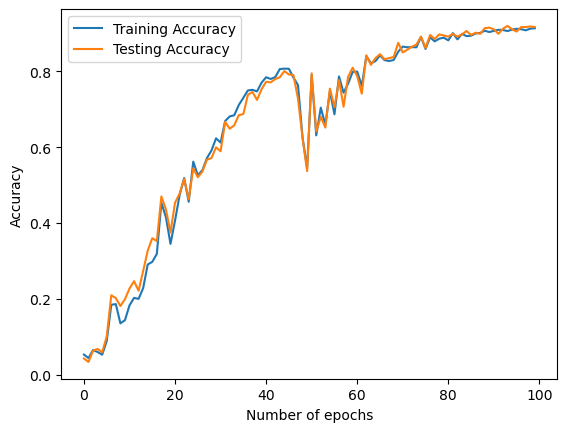

In [41]:
plt.plot(epochCount, trainAccCount, label = "Training Accuracy")
plt.plot(epochCount, testAccCount, label = "Testing Accuracy")
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()

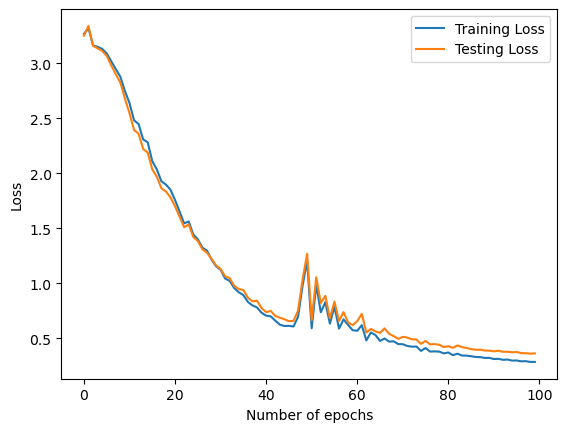

In [42]:
plt.plot(epochCount, trainLossCount, label = "Training Loss")
plt.plot(epochCount, testLossCount, label = "Testing Loss")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.legend()

In [43]:
import mediapipe as mp
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.5, max_num_hands=1)

In [92]:
modelPth = "../models/nnAbsLmks2"
torch.save(model_1.state_dict(), modelPth)